## Fit models to the sonar dataset

Sonar is a binary classification data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

In [2]:
sonar_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'

sonar_df = pd.read_csv( sonar_url, header=None, prefix='X' )

print( sonar_df.shape )

(208, 61)


In [3]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      208 non-null    float64
 1   X1      208 non-null    float64
 2   X2      208 non-null    float64
 3   X3      208 non-null    float64
 4   X4      208 non-null    float64
 5   X5      208 non-null    float64
 6   X6      208 non-null    float64
 7   X7      208 non-null    float64
 8   X8      208 non-null    float64
 9   X9      208 non-null    float64
 10  X10     208 non-null    float64
 11  X11     208 non-null    float64
 12  X12     208 non-null    float64
 13  X13     208 non-null    float64
 14  X14     208 non-null    float64
 15  X15     208 non-null    float64
 16  X16     208 non-null    float64
 17  X17     208 non-null    float64
 18  X18     208 non-null    float64
 19  X19     208 non-null    float64
 20  X20     208 non-null    float64
 21  X21     208 non-null    float64
 22  X2

The last column is the binary outcome we wish to classify.

In [4]:
sonar_df.rename(columns={'X60': 'response'}, inplace=True)

In [5]:
sonar_df.response = sonar_df.response.astype('category')

In [6]:
sonar_df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X51,X52,X53,X54,X55,X56,X57,X58,X59,response
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [7]:
sonar_df.response.value_counts()

M    111
R     97
Name: response, dtype: int64

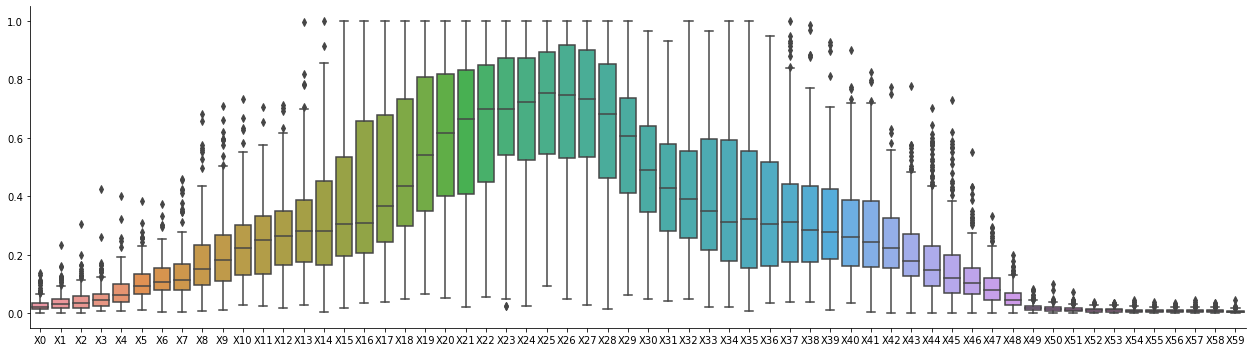

In [8]:
sns.catplot(data = sonar_df, kind='box', aspect=3.5)

plt.show()

Look at the correlation matrix.

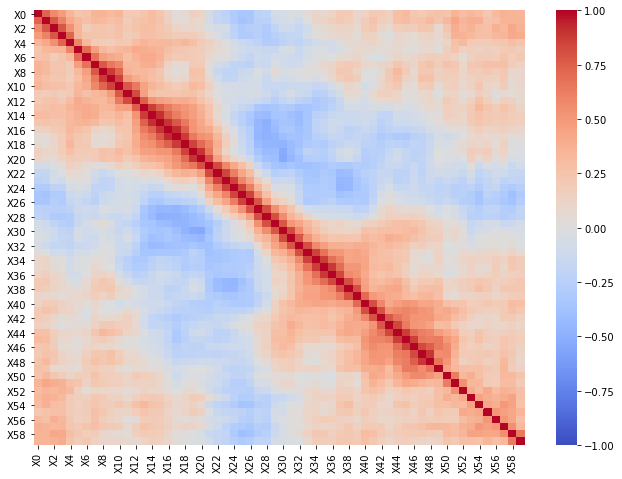

In [9]:
fig, ax = plt.subplots(figsize=(11, 8))

sns.heatmap(data = sonar_df.corr(), vmin=-1, vmax=1, center=0, cmap='coolwarm')

plt.show()

Definite correlation structure between the variables.

## Elastic net

It's a mixture or a blending between Ridge and Lasso.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

Define our cross-validation - use 5-fold with 3 repeats

In [12]:
my_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

Setup the "default" elastic net model for logistic regression. It uses the default value for `C` which is 1.0 and we will use a equal mixing between ridge and lasso. If we would use `l1_ratio=1.0` that corresponds to lasso, if we would use an `l1_ratio=0` that corresponds to ridge.

In [13]:
enet_default = LogisticRegression(penalty='elasticnet', solver='saga', random_state=101, max_iter=10001, C=1.0, l1_ratio=0.5)

## Create the pipeline

In [14]:
from sklearn.pipeline import Pipeline

In [15]:
standardize_features = StandardScaler()

Define the workflow for training the elastic net model per fold.

In [16]:
one_workflow = Pipeline( steps=[ ('std_scale', standardize_features), ('enet', enet_default) ])

Create the input and response feature arrays.

In [17]:
xinputs = sonar_df.select_dtypes('number').copy()
youtput = sonar_df.loc[:, ['response']].copy()

Convert to NumPy arrays.

In [18]:
X_train = xinputs.to_numpy()
y_train = youtput.response.to_numpy().ravel()

In [19]:
y_train.shape

(208,)

## Cross-validation with `cross_val_score()`

In [20]:
from sklearn.model_selection import cross_val_score

Use cross-validation to calculate the average accuracy across the fold hold-out sets.

In [21]:
enet_default_cv_scores = cross_val_score(one_workflow, X_train, y_train, cv=my_cv)

In [22]:
enet_default_cv_scores

array([0.80952381, 0.78571429, 0.66666667, 0.82926829, 0.80487805,
       0.73809524, 0.80952381, 0.64285714, 0.87804878, 0.85365854,
       0.71428571, 0.78571429, 0.83333333, 0.75609756, 0.75609756])

In [23]:
enet_default_cv_scores.mean()

0.7775842044134726

## Tune the parameters using grid search

In [24]:
from sklearn.model_selection import GridSearchCV

Re initialize the elastic net object where we do **not** specify the `C` and `l1_ratio` parameters.

In [25]:
enet_to_fit = LogisticRegression(penalty='elasticnet', solver='saga', random_state=101, max_iter=10001)

Define the new workflow with the elastic net that will be tuned.

In [26]:
enet_cv_workflow = Pipeline( steps = [('std_scale', standardize_features), ('enet', enet_to_fit)])

Define the grid for **both** parameters.

In [27]:
enet_grid = {'enet__C': np.exp(np.linspace(-6, 6, num=11)),
            'enet__l1_ratio': np.linspace(0, 1, num=5)}

In [28]:
enet_search = GridSearchCV(enet_cv_workflow, enet_grid, cv=my_cv)

Execute the cross-validation to tune `C` and `l1_ratio`.

In [29]:
enet_search_results = enet_search.fit(X_train, y_train)

The best tuning parameter values that maximize the score.

In [30]:
enet_search_results.best_params_

{'enet__C': 0.02732372244729256, 'enet__l1_ratio': 0.0}

The cross-validation average score for the best performing model.

In [31]:
enet_search_results.best_score_

0.7949283778552073

The coefficients associated with the optimal model.

In [32]:
enet_search_results.best_estimator_.named_steps

{'std_scale': StandardScaler(),
 'enet': LogisticRegression(C=0.02732372244729256, l1_ratio=0.0, max_iter=10001,
                    penalty='elasticnet', random_state=101, solver='saga')}

In [33]:
enet_search_results.best_estimator_.named_steps['enet'].intercept_

array([-0.26014305])

In [34]:
enet_search_results.best_estimator_.named_steps['enet'].coef_

array([[-0.14979583, -0.0521433 ,  0.02951   , -0.1409158 , -0.08617428,
         0.03501099,  0.07888603,  0.05510751, -0.13850097, -0.1231101 ,
        -0.23523385, -0.24120819, -0.10146612,  0.04234969,  0.09731707,
         0.12245345,  0.08910154,  0.02308665, -0.07264918, -0.13034531,
        -0.13503932, -0.106025  , -0.09761198, -0.07693762, -0.00576502,
        -0.00673794, -0.04570113, -0.08110918, -0.08413878, -0.05862863,
         0.14912071,  0.0050346 , -0.0098259 ,  0.05097254,  0.10822253,
         0.20330476,  0.17702743, -0.00890686, -0.05948244,  0.11027807,
         0.04257434, -0.03329149, -0.10676503, -0.15959043, -0.1795946 ,
        -0.13341243, -0.10658909, -0.15168431, -0.1909735 ,  0.05829023,
        -0.12730796, -0.16413378, -0.02933234, -0.10176428,  0.04482546,
        -0.02804978,  0.11968478, -0.08695396, -0.08880728, -0.02659645]])

Visualize the accuracy across the different values of `C` and `l1_ratio`.

In [36]:
enet_search_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_enet__C', 'param_enet__l1_ratio', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'split10_test_score', 'split11_test_score', 'split12_test_score', 'split13_test_score', 'split14_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [37]:
enet_cv_summary = pd.DataFrame({'C': enet_search_results.cv_results_['param_enet__C'].data.astype('float64'),
                               'l1_ratio': enet_search_results.cv_results_['param_enet__l1_ratio'].data.astype('float64'),
                               'mean_test_score': enet_search_results.cv_results_['mean_test_score'],
                               'std_test_score': enet_search_results.cv_results_['std_test_score']})

In [38]:
### the standard error is calculated assuming 5 fold and 3 repeats
enet_cv_summary['log_C'] = np.log(enet_cv_summary.C)
enet_cv_summary['mean_test_score_se'] = enet_cv_summary.std_test_score / np.sqrt(15)

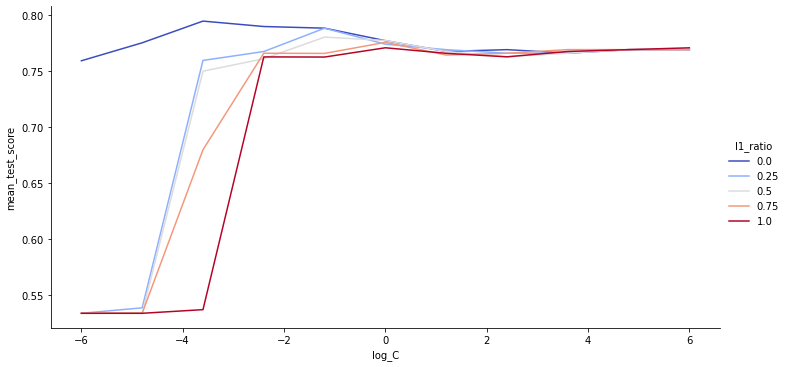

In [39]:
sns.relplot(data=enet_cv_summary, x='log_C', y='mean_test_score', hue='l1_ratio',
            kind='line',
           palette='coolwarm', aspect=2)

plt.show()